In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [132]:
import csv

train_path = 'Arabic Handwritten Digits Dataset CSV/csvTrainImages 60k x 784.csv'
train_labels = 'Arabic Handwritten Digits Dataset CSV/csvTrainLabel 60k x 1.csv'
test_path = 'Arabic Handwritten Digits Dataset CSV/csvTestImages 10k x 784.csv'
test_labels = 'Arabic Handwritten Digits Dataset CSV/csvTestLabel 10k x 1.csv'

train_img = pd.read_csv(train_path)
train_labels = pd.read_csv(train_labels)
test_img = pd.read_csv(test_path)
test_labels = pd.read_csv(test_labels)

In [133]:
train_img.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.486,0.487,0.488,0.489,0.490,0.491,0.492,0.493,0.494,0.495
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
test_labels.tail()

,0
9994,5
9995,6
9996,7
9997,8
9998,9


In [135]:
len(train_img)

59999

In [136]:
def one_hot_encode(labels, n_labels):
    one_hot = np.zeros((len(labels), n_labels))
    for label, array in zip(labels, one_hot):
        array[label] = 1
    return one_hot

In [137]:
def load(train_img, train_labels, test_img, test_labels):
    X_tr = train_img.as_matrix()
    Y_tr = train_labels.as_matrix()
    X_te = test_img.as_matrix()
    Y_te = test_labels.as_matrix()
    return X_tr, Y_tr, X_te, Y_te

In [138]:
from sklearn.model_selection import train_test_split

In [141]:
X_tr, Y_tr, X_te, Y_te = load(train_img, train_labels, test_img, test_labels)
X_tr = np.reshape(X_tr, (-1, 28, 28, 1))
X_te = np.reshape(X_te, (-1, 28, 28, 1))
labels = (np.max(Y_tr)) + 1


In [142]:
len(X_tr)

59999

In [143]:
X_tr, X_val, Y_tr, Y_val = train_test_split(X_tr, Y_tr, test_size=0.15, random_state=0)

In [144]:
Y_tr = one_hot_encode(Y_tr, labels)
Y_tr
Y_te = one_hot_encode(Y_te, labels)
Y_val_ = one_hot_encode(Y_val, labels)
Y_val_

array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [145]:
def weight_var(shape):
    w = tf.truncated_normal(shape=shape, stddev=0.1)
    return tf.Variable(w)
def bias_var(shape):
    b = tf.constant(0.1, shape=shape)
    return tf.Variable(b)


def CNN(x, n_classes):
    
    strides = [1, 1, 1, 1]
    strides2 = [1, 2, 2, 1]
    ksize = strides2
    w1 = weight_var(shape=[5, 5, 1, 32])
    b1 = bias_var(shape=[32])
    layer1 = tf.nn.conv2d(x, w1, strides=strides, padding='VALID')
    layer1 = tf.nn.bias_add(layer1, b1)
    layer1 = tf.nn.relu(layer1)
    
    #layer1 = tf.nn.max_pool(layer1, ksize=ksize, strides=strides2, padding'VALID')
    

    w2 = weight_var(shape=[5, 5, 32, 64])
    b2 = bias_var(shape=[64])
    layer2 = tf.nn.conv2d(layer1, w2, strides=strides, padding='VALID')
    layer2 = tf.nn.bias_add(layer2, b2)
    layer2 = tf.nn.relu(layer2)
    
    layer2 = tf.nn.max_pool(layer2, ksize=ksize, strides=strides2, padding='VALID')
    

    w3 = weight_var(shape=[5, 5, 64, 64])
    b3 = bias_var(shape=[64])
    layer3 = tf.nn.conv2d(layer2, w3, strides=strides, padding='VALID')
    layer3 = tf.nn.bias_add(layer3, b3)
    layer3 = tf.nn.relu(layer3)
    
    layer3 = tf.nn.max_pool(layer3, ksize=ksize, strides=strides2, padding='SAME')
    
    
    flatten = tf.contrib.layers.flatten(layer3)
    dim = flatten.get_shape().as_list()
    
    wc1 = weight_var(shape=[dim[1], 256])
    bc1 = bias_var([256])
    fc1 = tf.matmul(flatten, wc1)
    fc1 = tf.nn.bias_add(fc1, bc1)
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)
    
    wc2 = weight_var(shape=[256, n_classes])
    bc2 = bias_var([n_classes])
    fc2 = tf.matmul(fc1, wc2)
    logits = tf.add(fc2, bc2)
    return logits
    
    
    

In [146]:
def stats(X_batch, Y_batch):
    total_loss = 0
    total_acc = 0
    samples = len(X_batch)
    #X_batch = np.reshape(X_batch, [-1, n_steps, n_inputs])
    sess = tf.get_default_session()
    for offset in range(0, samples, batch_size):
        end = offset+batch_size
        xs_batch, ys_batch = X_batch[offset:end], Y_batch[offset:end]
        loss_, acc = sess.run([loss, accuracy], feed_dict={x:xs_batch, 
                                                           y:ys_batch,
                                                           keep_prob:1.0
                                                           })
        total_loss += (float(loss_)*xs_batch.shape[0])
        total_acc += (float(acc)*xs_batch.shape[0])

    return (total_loss)/samples, (total_acc)/samples

In [159]:
tf.reset_default_graph()

In [160]:
learning_rate = 1e-3
n_classes = labels
x = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28, 1))
y = tf.placeholder(tf.float32, shape=(None, n_classes))
keep_prob = tf.placeholder(dtype=tf.float32)
#y_hot = tf.one_hot(y, 29)
y, x

(<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>,
 <tf.Tensor 'Placeholder:0' shape=(?, 28, 28, 1) dtype=float32>)

In [161]:
logits = CNN(x, n_classes)
softmax = tf.nn.softmax(logits)
logits

<tf.Tensor 'Add:0' shape=(?, 10) dtype=float32>

In [162]:

step = tf.Variable(0, trainable=False)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate, beta1=0.9, beta2=0.99).minimize(loss, global_step=step)

prediction = tf.equal(tf.argmax(y, 1), tf.argmax(softmax, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, dtype=tf.float32))

In [163]:
print(X_tr.shape, Y_tr.shape)

(50999, 28, 28, 1) (50999, 10)


Initializing Training
EPOCH 1
Validation Loss = 2.894 and Validation Accuracy = 96.733 %
EPOCH 2
Validation Loss = 1.234 and Validation Accuracy = 97.656 %
EPOCH 3
Validation Loss = 0.716 and Validation Accuracy = 98.089 %
EPOCH 4
Validation Loss = 0.417 and Validation Accuracy = 98.167 %
EPOCH 5
Validation Loss = 0.250 and Validation Accuracy = 98.044 %
EPOCH 6
Validation Loss = 0.197 and Validation Accuracy = 97.667 %
EPOCH 7
Validation Loss = 0.152 and Validation Accuracy = 98.100 %
EPOCH 8
Validation Loss = 0.129 and Validation Accuracy = 98.211 %
EPOCH 9
Validation Loss = 0.114 and Validation Accuracy = 98.389 %
EPOCH 10
Validation Loss = 0.107 and Validation Accuracy = 98.344 %
EPOCH 11
Validation Loss = 0.098 and Validation Accuracy = 98.344 %
EPOCH 12
Validation Loss = 0.087 and Validation Accuracy = 98.656 %
EPOCH 13
Validation Loss = 0.101 and Validation Accuracy = 98.522 %
EPOCH 14
Validation Loss = 0.091 and Validation Accuracy = 98.689 %
EPOCH 15
Validation Loss = 0.086 an

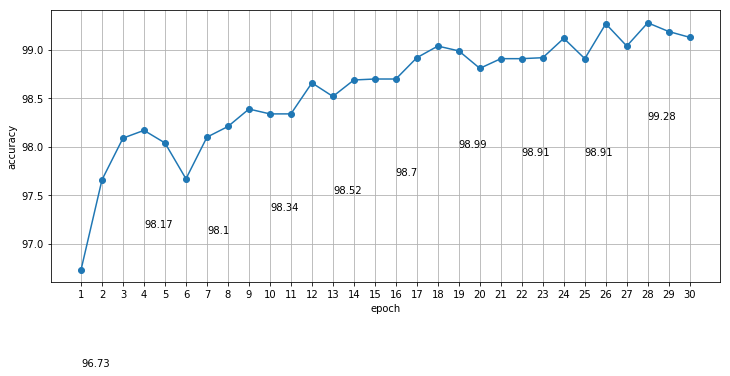

In [164]:
acc_map = []

from sklearn.utils import shuffle
batch_size = 128
epochs = 30
samples = len(X_tr)

count = 0
print("Initializing Training")
try:
    with tf.Session() as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(epochs):
            X_tr, Y_tr = shuffle(X_tr, Y_tr)
            for offset in range(0, samples, batch_size):
                end = offset+batch_size
                xs_batch, ys_batch = X_tr[offset:end], Y_tr[offset:end]
                loss_, _ = sess.run([loss, optimizer], feed_dict={x: xs_batch, 
                                                                  y: ys_batch,
                                                                 keep_prob:0.5})    

            validation_loss, validation_acc = stats(X_val, Y_val_)
            acc_map.append(round(validation_acc*100, 2))
            print("EPOCH {}".format(epoch + 1))
            print ("Validation Loss = {:.3f} and Validation Accuracy = {:.3f} %".format(validation_loss, 100 *validation_acc))
        plt.figure(figsize=(12, 5))
        plt.xticks(range(1, epochs+1))
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.grid(True)
        plt.plot(range(1, epochs+1), acc_map, '-o')
        for i, j in list(zip(range(1, epochs+1), acc_map))[0::3]:
            plt.text(i, j-1, str(j))
        test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: xs_batch, 
                                                                    y: ys_batch,
                                                                    keep_prob:1.01})  
        print ("Test Loss {} and Test Accuracy {:.3f} %".format(test_loss, 100 *test_acc))
except KeyboardInterrupt:
    print('Training interrupted')
    test_loss, test_acc = sess.run([loss, accuracy], feed_dict={x: xs_batch, 
                                                                    y: ys_batch})  
    print ("Test Loss {} and Test Accuracy {:.3f} %".format(test_loss, 100 *test_acc))